## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_data(data_path: str):
  data = "motorbike_ambulance_calls.csv"
  return data

In [3]:
data = get_data(data_path="motorbike_ambulance_calls.csv")

**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [5]:
df = pd.read_csv("motorbike_ambulance_calls.csv")

print("Типи даних у наборі:")
print(df.dtypes)

# Перевірка кількості значень у кожній змінній (чи є пропущені дані)
print("\nКількість значень у кожній змінній:")
print(df.count())

Типи даних у наборі:
index           int64
date           object
season         object
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

Кількість значень у кожній змінній:
index         17379
date          17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
cnt           17379
dtype: int64


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [6]:
missing_values = df.isnull().sum()

# Виведення результату
print("Кількість пропущених значень у кожному стовпці:")
print(missing_values)

# Додатково: перевіримо загальну кількість пропущених значень у всьому датасеті
total_missing = df.isnull().sum().sum()
print(f"\nЗагальна кількість пропущених значень у датасеті: {total_missing}")

Кількість пропущених значень у кожному стовпці:
index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

Загальна кількість пропущених значень у датасеті: 0


**Висновки з 1-3 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [11]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
    df[date_col_name] = pd.to_datetime(df[date_col_name], errors="coerce")
    return df

df = tranform_date(data, "date")

start_date = df["date"].min()
end_date = df["date"].max()

print(f"Часові межі датасету: {start_date} – {end_date}")

Часові межі датасету: 2011-01-01 00:00:00 – 2012-12-31 00:00:00


In [12]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
    first_day = df[date_col_name].min()  # Знаходимо найменшу дату
    last_day = df[date_col_name].max()   # Знаходимо найбільшу дату
    print(f"First day of dataset - {first_day}.\nLast day of dataset - {last_day}")

# Використання функції
get_time_limits(df, "date")


First day of dataset - 2011-01-01 00:00:00.
Last day of dataset - 2012-12-31 00:00:00


In [ ]:
#your conclusions

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [13]:

data_categorical = df.select_dtypes(include=["object", "category"])
print(data_categorical.head())


   season
0  spring
1  spring
2  spring
3  spring
4  spring


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [14]:
def encode_season(df: pd.DataFrame, season_col_name: str):
    season_mapping = {"spring": 1, "summer": 2, "fall": 3, "winter": 4}
    df[season_col_name] = df[season_col_name].map(season_mapping)
    return df

data = encode_season(data, "season")

print(data["season"].unique())

[ 1.  2. nan  4.]


**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4236575068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[variable], ax=subplot, palette="viridis")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4236575068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[variable], ax=subplot, palette="viridis")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4236575068.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[variable], ax=subplot, palette="viridis")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4236575068.

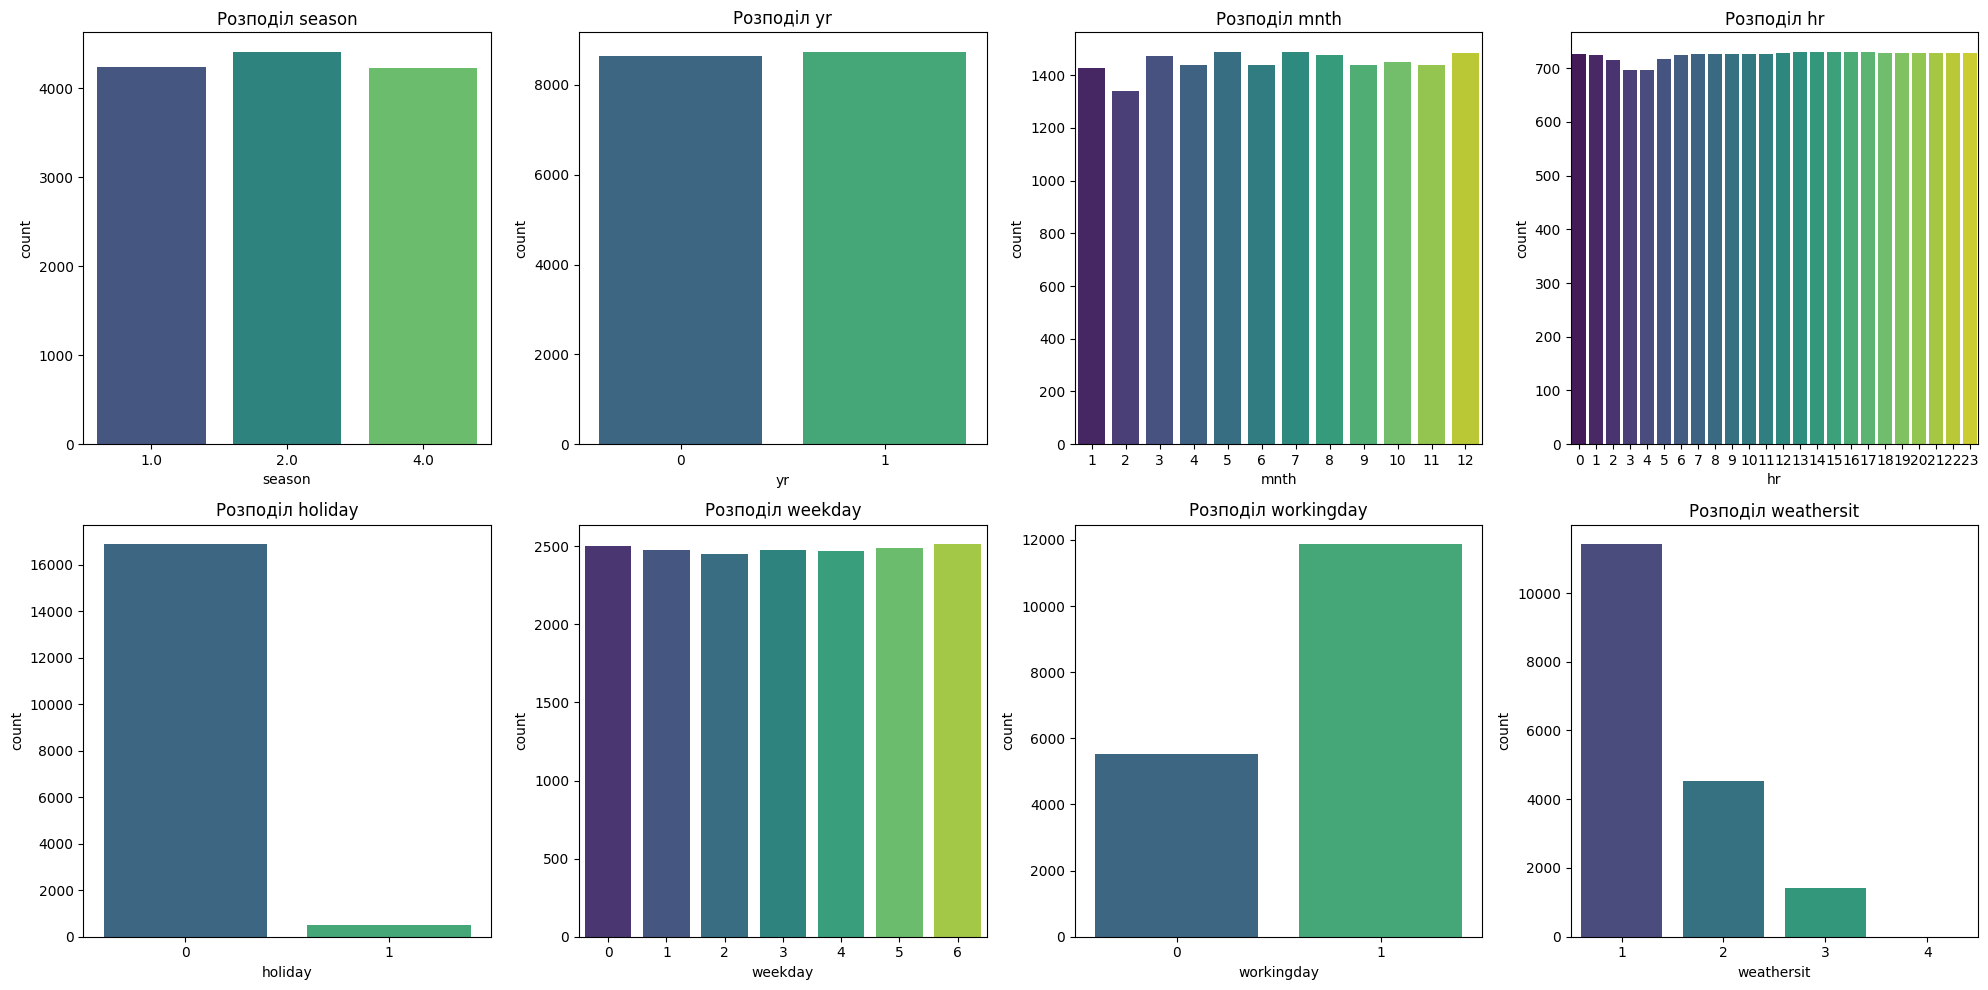

In [15]:
categorical_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot, palette="viridis")
    subplot.set_title(f"Розподіл {variable}")

plt.tight_layout()
plt.show()


**Висновки з 5-7 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4280944242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[variable], ax=subplot, palette="viridis")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4280944242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[variable], ax=subplot, palette="viridis")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\4280944242.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[variable], ax=subplot, palette="viridis")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\42809442

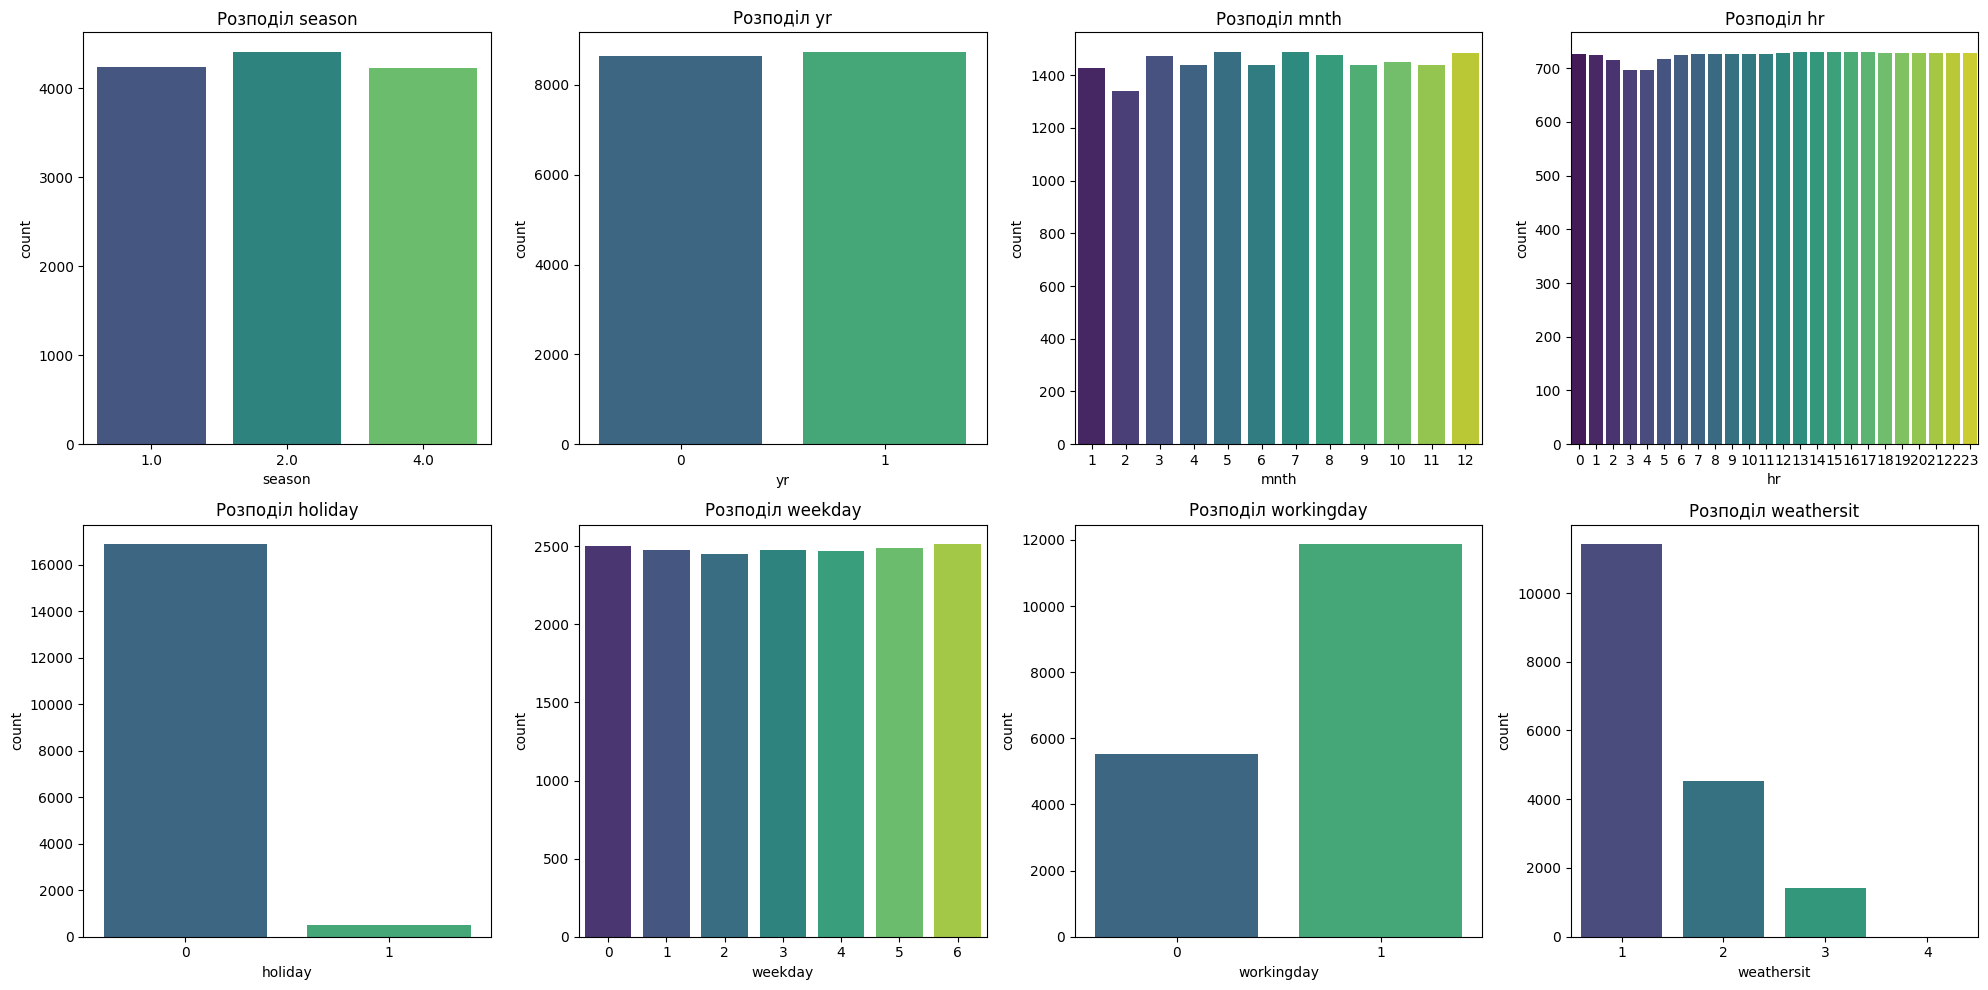

In [16]:
categorical_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

# Виділення числових змінних
data_numerical = df.select_dtypes(include=["int64", "float64"])

# Створення графіків
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for variable, subplot in zip(categorical_columns, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot, palette="viridis")
    subplot.set_title(f"Розподіл {variable}")

plt.tight_layout()
plt.show()

**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

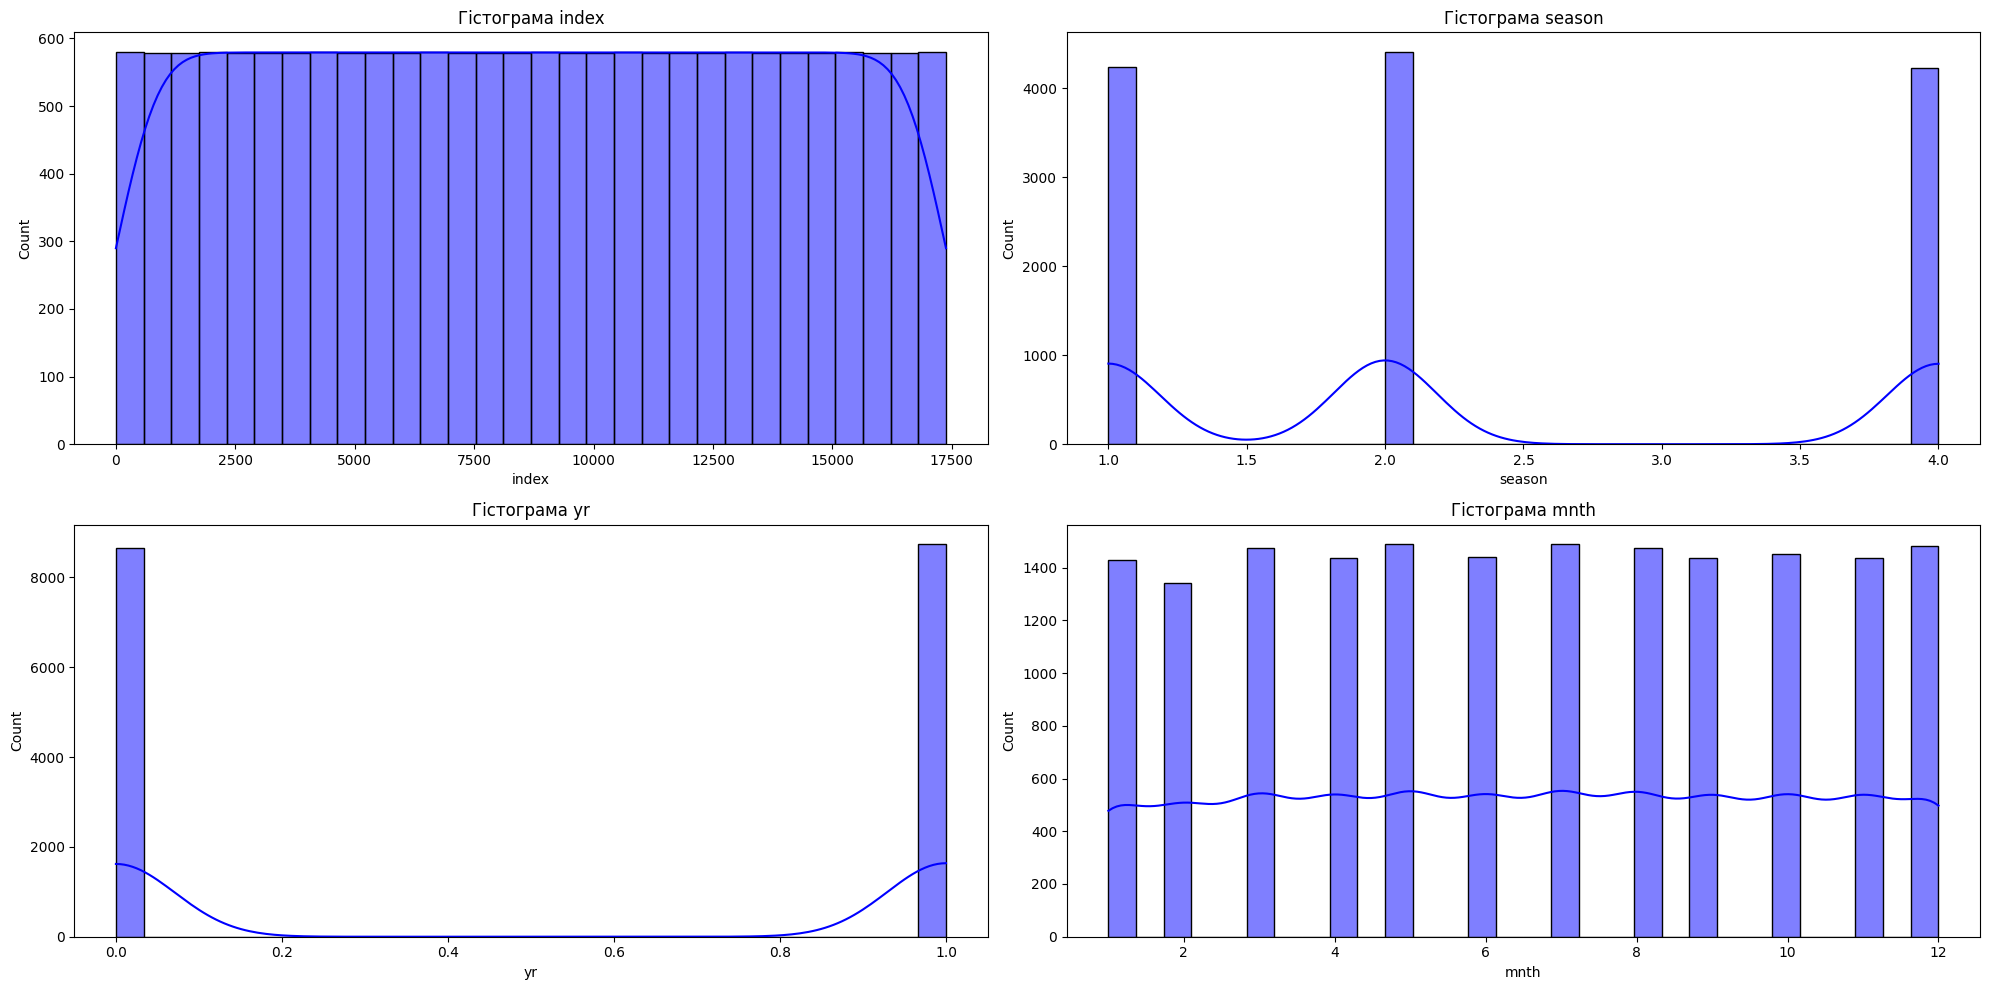

In [19]:
categorical_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"]

# Виділення числових змінних
data_numerical = df.select_dtypes(include=["int64", "float64"])

# Побудова гістограм для числових змінних
fig, ax = plt.subplots(2, 2, figsize=(20, 10))

for variable, subplot in zip(data_numerical.columns, ax.flatten()):
    sns.histplot(df[variable], ax=subplot, kde=True, bins=30, color="blue")
    subplot.set_title(f"Гістограма {variable}")

plt.tight_layout()
plt.show()

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

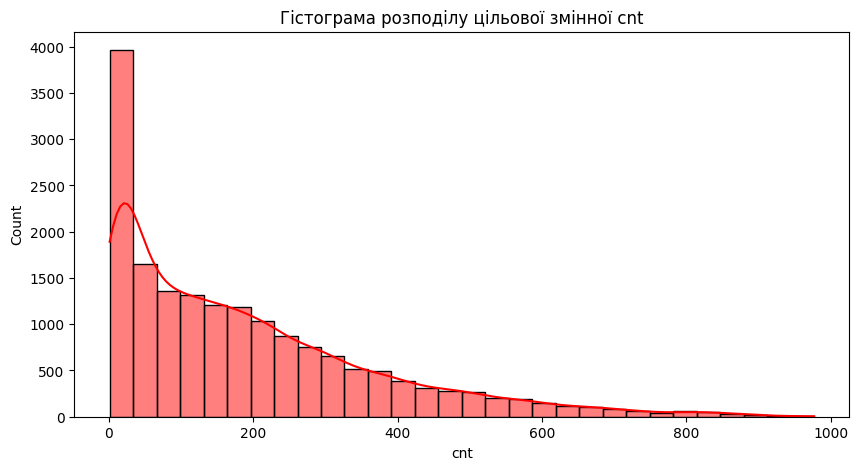

Коефіцієнт нахилу цільової змінної: 1.2774116037490577


In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df["cnt"], ax=ax, kde=True, bins=30, color="red")
ax.set_title("Гістограма розподілу цільової змінної cnt")
plt.show()

# Розрахунок коефіцієнта нахилу (асиметрії)
skewness = df["cnt"].skew()
print(f"Коефіцієнт нахилу цільової змінної: {skewness}")


**Висновки з 8-10 завдання (детальні)**



1.   
2.   
3. ...



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

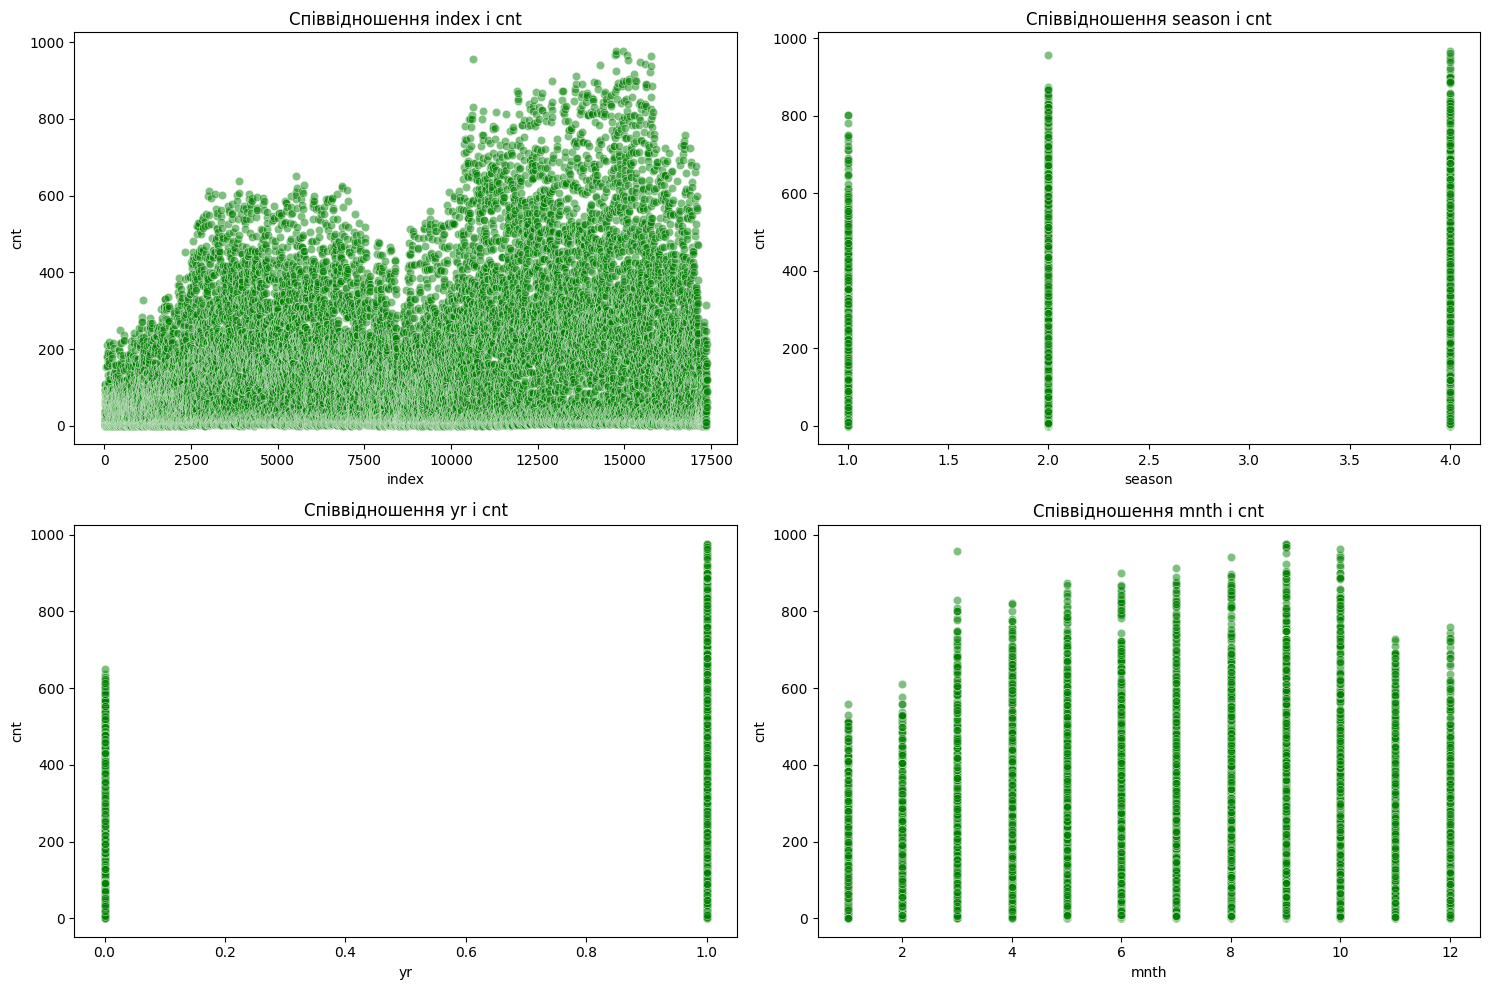

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for var, subplot in zip(data_numerical.drop('cnt', axis=1), ax.flatten()):
    sns.scatterplot(x=df[var], y=df["cnt"], ax=subplot, color="green", alpha=0.5)
    subplot.set_title(f"Співвідношення {var} і cnt")

plt.tight_layout()
plt.show()

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\1602483859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["cnt"], ax=subplot, palette="coolwarm")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\1602483859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["cnt"], ax=subplot, palette="coolwarm")
C:\Users\psycho\AppData\Local\Temp\ipykernel_1336\1602483859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], y=df["cnt"], ax=subplot, palette="coolwarm")
C:\Users\psycho\AppData\Local\Temp\ipyke

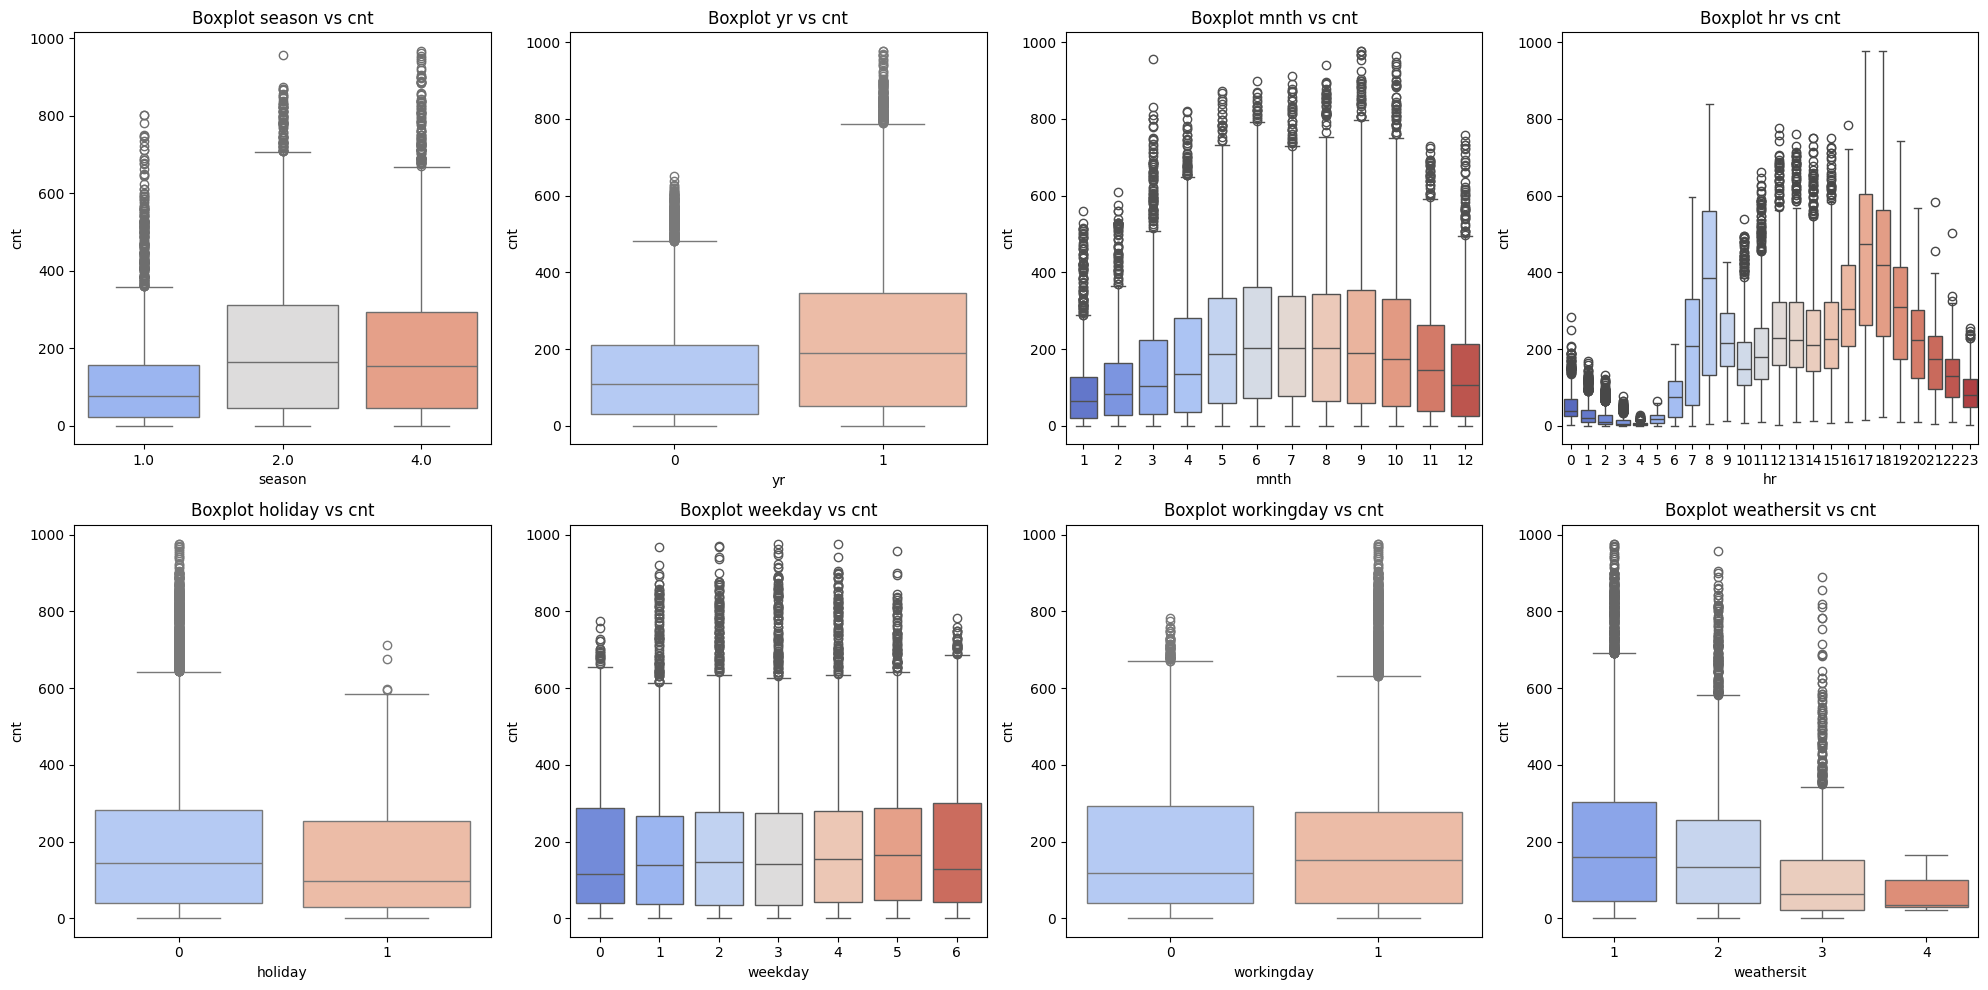

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

for var, subplot in zip(categorical_columns, ax.flatten()):
    sns.boxplot(x=df[var], y=df["cnt"], ax=subplot, palette="coolwarm")
    subplot.set_title(f"Boxplot {var} vs cnt")

plt.tight_layout()
plt.show()

**Висновки з 11-12 завдання (детальні)**



1.   
2.   
3. ...



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

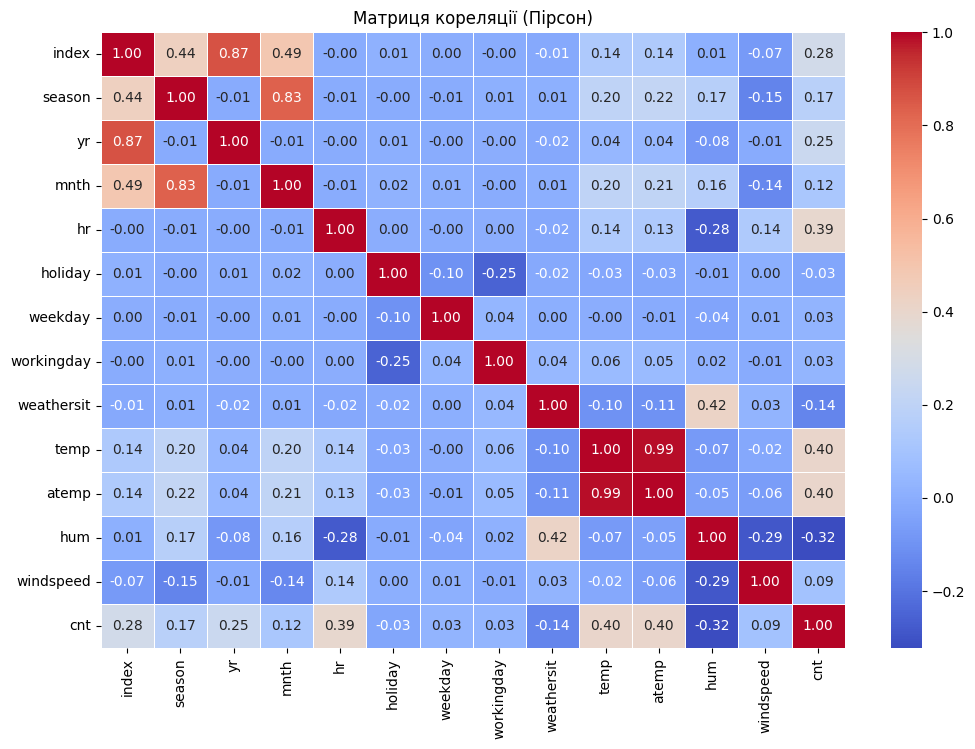

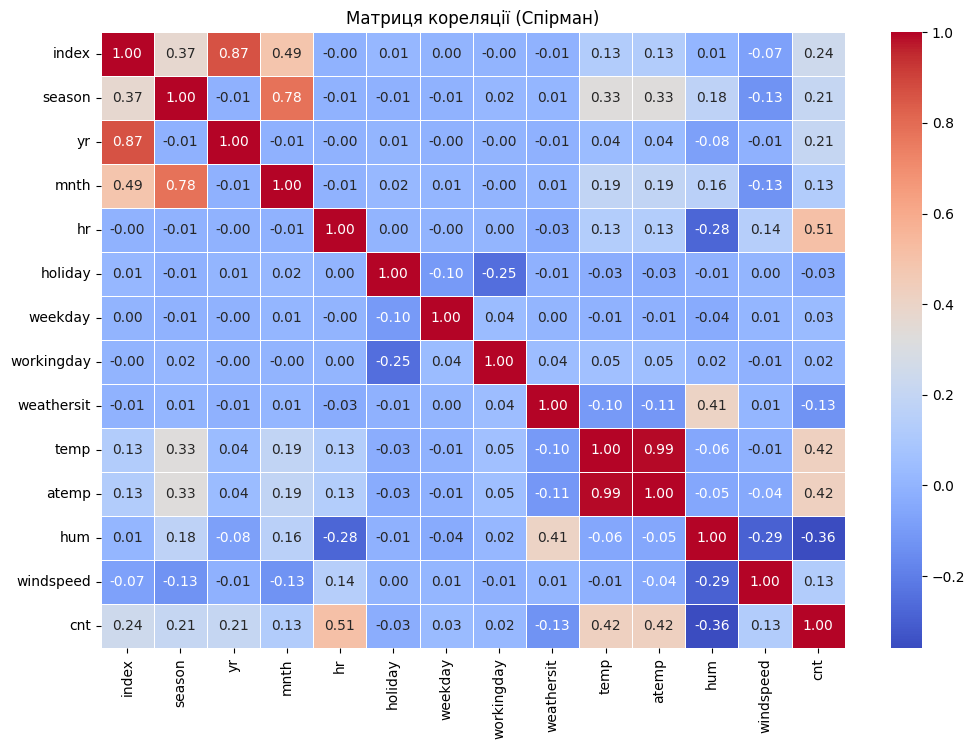

In [22]:
corr_matrix_pearson = data_numerical.corr(method="pearson")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_pearson, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матриця кореляції (Пірсон)")
plt.show()

corr_matrix_spearman = data_numerical.corr(method="spearman")

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Матриця кореляції (Спірман)")
plt.show()

Метод Пірсона вимірює лінійну залежність між змінними, тоді як метод Спірмана оцінює монотонні залежності. Високі значення кореляції в матриці Пірсона вказують на сильніші лінійні зв'язки, у той час як у матриці Спірмана можуть бути виявлені більш загальні, нелінійні залежності між змінними.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [23]:
df_cleaned = df.drop(columns=["index", "date", "yr", "holiday", "workingday"])

def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                          pd.get_dummies(df['season'], prefix='season'),
                          pd.get_dummies(df['mnth'], prefix='mnth'),
                          pd.get_dummies(df['weekday'], prefix='weekday'),
                          pd.get_dummies(df['weathersit'], prefix='weather')], axis=1)
    features = features.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1)
    return features

df_encoded = get_dummies(df_cleaned)

X = df_encoded.drop(columns=['cnt'])
y = df_encoded['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Середньоквадратична помилка: {mse}')

Mean Squared Error: 20071.14134890175


In [ ]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [24]:
features = df.copy()
features['night_hours'] = features['hr'].apply(lambda x: 1 if (x >= 22 or x <= 6) else 0)

features = features.drop(columns=['hr'])

print(features.head())

   index       date  season  yr  mnth  holiday  weekday  workingday  \
0      1 2011-01-01     1.0   0     1        0        6           0   
1      2 2011-01-01     1.0   0     1        0        6           0   
2      3 2011-01-01     1.0   0     1        0        6           0   
3      4 2011-01-01     1.0   0     1        0        6           0   
4      5 2011-01-01     1.0   0     1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  cnt  night_hours  
0           1  0.24  0.2879  0.81        0.0   16            1  
1           1  0.22  0.2727  0.80        0.0   40            1  
2           1  0.22  0.2727  0.80        0.0   32            1  
3           1  0.24  0.2879  0.75        0.0   13            1  
4           1  0.24  0.2879  0.75        0.0    1            1  


**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [38]:
features_lr = features.drop(['spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], 
                            axis=1, errors='ignore')

In [39]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
  X = df.drop(columns=[target])
  y = df[target]
  X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
  return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [43]:
def train_linear_model(X_train, y_train):
    # Перевірка наявності NaN
    if X_train.isnull().sum().sum() > 0:
        X_train = X_train.fillna(X_train.mean())
    
    if y_train.isnull().sum() > 0:
        y_train = y_train.fillna(y_train.mean())
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Викликаємо функцію навчання
model = train_linear_model(X_train, y_train)

In [26]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MsE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 21482.090, test: 20071.141
R^2 train: 0.358, test: 0.365


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

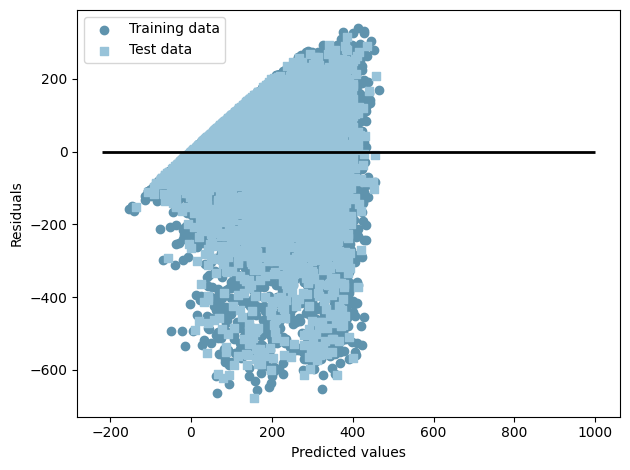

In [27]:
plt.scatter(y_train_pred, y_train_pred - y_train, 
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, 
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()
plt.show()

**Висновки з завдання (детальні)**



1.   
2.   
3. ...

